# Data Preprocessing

### Import Libraries

In [268]:
import statistics
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
import tensorflow as tf
import joblib
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Data Load


In [269]:
data=pd.read_csv('/content/Mobile Price Prediction.csv')

### Data Understanding

In [270]:
data.head()

,Unnamed: 0,Brand me,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
0,0,"LG V30+ (Black, 128 )",4.3,4.0,128.0,6.00,48,13.0,4000,24999
1,1,I Kall K11,3.4,6.0,64.0,4.50,48,12.0,4000,15999
2,2,Nokia 105 ss,4.3,4.0,4.0,4.50,64,16.0,4000,15000
3,3,"Samsung Galaxy A50 (White, 64 )",4.4,6.0,64.0,6.40,48,15.0,3800,18999
4,4,"POCO F1 (Steel Blue, 128 )",4.5,6.0,128.0,6.18,35,15.0,3800,18999


In [271]:
data.tail()

,Unnamed: 0,Brand me,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
831,831,Karbonn K24 Plus Pro,3.8,6.0,32.0,4.54,48,12.0,2800,1299
832,832,InFocus POWER 2,4.1,8.0,64.0,4.54,64,NaN,2500,1390
833,833,"Alcatel 5V (Spectrum Blue, 32 )",4.4,3.0,32.0,6.20,48,1.0,3800,9790
834,834,JIVI JV 12M,3.7,10.0,32.0,4.50,64,NaN,3500,799
835,835,Blacear B5 Grip,3.5,6.0,32.0,4.50,64,15.0,1050,799


In [272]:
data.shape

(836, 10)

In [273]:
data.columns

Index(['Unnamed: 0', 'Brand me', 'Ratings', 'RAM', 'ROM', 'Mobile_Size',
       'Primary_Cam', 'Selfi_Cam', 'Battery_Power', 'Price'],
      dtype='object')

In [274]:
data = data.drop(columns=['Unnamed: 0'])

In [275]:
data.describe()

,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
count,805.000000,829.000000,832.000000,834.000000,836.000000,567.000000,836.000000,836.00000
mean,4.103106,6.066345,64.373077,5.597282,47.983254,9.784832,3274.688995,18220.34689
std,0.365356,2.530336,53.447825,3.898664,11.170093,6.503838,927.518852,52805.55022
min,2.800000,0.000000,0.000000,2.000000,5.000000,0.000000,1020.000000,479.00000
25%,3.800000,6.000000,32.000000,4.500000,48.000000,5.000000,3000.000000,984.75000
50%,4.100000,6.000000,40.000000,4.770000,48.000000,8.000000,3000.000000,1697.00000
75%,4.400000,6.000000,64.000000,6.300000,48.000000,13.000000,3800.000000,18999.00000
max,4.800000,34.000000,256.000000,44.000000,64.000000,61.000000,6000.000000,573000.00000


In [276]:
data.dtypes

,0
Brand me,object
Ratings,float64
RAM,float64
ROM,float64
Mobile_Size,float64
Primary_Cam,int64
Selfi_Cam,float64
Battery_Power,int64
Price,int64


In [277]:
data.isnull().sum()

,0
Brand me,0
Ratings,31
RAM,7
ROM,4
Mobile_Size,2
Primary_Cam,0
Selfi_Cam,269
Battery_Power,0
Price,0


In [278]:
data.duplicated().sum()

206

### Handle Missing Values

In [279]:
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)

<ipython-input-279-22604326cc6e>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)


In [280]:
numerical_cols = data.select_dtypes(include=['float64']).columns
for col in numerical_cols:
    data[col].fillna(data[col].mean(), inplace=True)

<ipython-input-280-a6aee263a1ff>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(), inplace=True)


In [281]:
data.isnull().sum()

,0
Brand me,0
Ratings,0
RAM,0
ROM,0
Mobile_Size,0
Primary_Cam,0
Selfi_Cam,0
Battery_Power,0
Price,0


In [282]:
# Create copy of the original DataFrame
Original_data = data.copy()

### Standardizing

In [283]:
# Standardize column names
data.columns = data.columns.str.strip() # Remove leading/trailing whitespace
data.columns = data.columns.str.lower() # Convert to lowercase
data.columns = data.columns.str.replace(' ', '_') # Replace spaces with underscores
data.columns = data.columns.str.replace(r'[^\w\s]', '') # Remove special characters (except underscores)

# Display standardized column names
print("Standardized column names:", data.columns)

# Display the DataFrame
print(data)

Standardized column names: Index(['brand_me', 'ratings', 'ram', 'rom', 'mobile_size', 'primary_cam',
       'selfi_cam', 'battery_power', 'price'],
      dtype='object')
                            brand_me  ratings   ram    rom  mobile_size  \
0              LG V30+ (Black, 128 )      4.3   4.0  128.0         6.00   
1                         I Kall K11      3.4   6.0   64.0         4.50   
2                       Nokia 105 ss      4.3   4.0    4.0         4.50   
3    Samsung Galaxy A50 (White, 64 )      4.4   6.0   64.0         6.40   
4         POCO F1 (Steel Blue, 128 )      4.5   6.0  128.0         6.18   
..                               ...      ...   ...    ...          ...   
831             Karbonn K24 Plus Pro      3.8   6.0   32.0         4.54   
832                  InFocus POWER 2      4.1   8.0   64.0         4.54   
833  Alcatel 5V (Spectrum Blue, 32 )      4.4   3.0   32.0         6.20   
834                      JIVI JV 12M      3.7  10.0   32.0         4.50   
835  

In [284]:
data.columns

Index(['brand_me', 'ratings', 'ram', 'rom', 'mobile_size', 'primary_cam',
       'selfi_cam', 'battery_power', 'price'],
      dtype='object')

### Encoding

In [285]:
# Example function to classify columns
def classify_columns(data):
    ordinal_columns = {}
    nominal_columns = []

    for col in data.select_dtypes(include=['object']).columns:
        unique_vals = data[col].nunique()

        # Assuming fewer than 10 unique values could be ordinal (manual review needed)
        if unique_vals <= 10:
            # Manual review required to confirm if they are ordinal
            print(f"Check if '{col}' should be ordinal")
            # For example, you could categorize these manually based on domain knowledge
            # ordinal_columns[col] = <order>
        else:
            nominal_columns.append(col)

    return ordinal_columns, nominal_columns

ordinal_cols, nominal_cols = classify_columns(data)

print("Ordinal Columns:", ordinal_cols)
print("Nominal Columns:", nominal_cols)

Ordinal Columns: {}
Nominal Columns: ['brand_me']


In [286]:
#Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'brand_me' column
data['brand_me'] = label_encoder.fit_transform(data['brand_me'])

# Display the DataFrame to verify changes
print("DataFrame after label encoding:")
print(data)

DataFrame after label encoding:
     brand_me  ratings   ram    rom  mobile_size  primary_cam  selfi_cam  \
0         184      4.3   4.0  128.0         6.00           48  13.000000   
1          82      3.4   6.0   64.0         4.50           48  12.000000   
2         250      4.3   4.0    4.0         4.50           64  16.000000   
3         349      4.4   6.0   64.0         6.40           48  15.000000   
4         303      4.5   6.0  128.0         6.18           35  15.000000   
..        ...      ...   ...    ...          ...          ...        ...   
831       153      3.8   6.0   32.0         4.54           48  12.000000   
832       117      4.1   8.0   64.0         4.54           64   9.784832   
833         3      4.4   3.0   32.0         6.20           48   1.000000   
834       139      3.7  10.0   32.0         4.50           64   9.784832   
835        27      3.5   6.0   32.0         4.50           64  15.000000   

     battery_power  price  
0             4000  24999  

In [287]:
data.dtypes

,0
brand_me,int64
ratings,float64
ram,float64
rom,float64
mobile_size,float64
primary_cam,int64
selfi_cam,float64
battery_power,int64
price,int64


## Data Visualization

# Feature Selection and Engineering

### Correlation

               brand_me   ratings       ram       rom  mobile_size  \
brand_me       1.000000  0.400408 -0.079042  0.319278     0.062709   
ratings        0.400408  1.000000  0.099955  0.454800     0.088881   
ram           -0.079042  0.099955  1.000000  0.251482    -0.001273   
rom            0.319278  0.454800  0.251482  1.000000     0.108041   
mobile_size    0.062709  0.088881 -0.001273  0.108041     1.000000   
primary_cam    0.069310 -0.091763  0.139794 -0.069758    -0.059897   
selfi_cam     -0.118989 -0.137997  0.167904 -0.107695    -0.049400   
battery_power  0.354186  0.468817  0.023220  0.409200     0.131604   
price         -0.007689  0.366343  0.236886  0.255621     0.049081   

               primary_cam  selfi_cam  battery_power     price  
brand_me          0.069310  -0.118989       0.354186 -0.007689  
ratings          -0.091763  -0.137997       0.468817  0.366343  
ram               0.139794   0.167904       0.023220  0.236886  
rom              -0.069758  -0.107695  

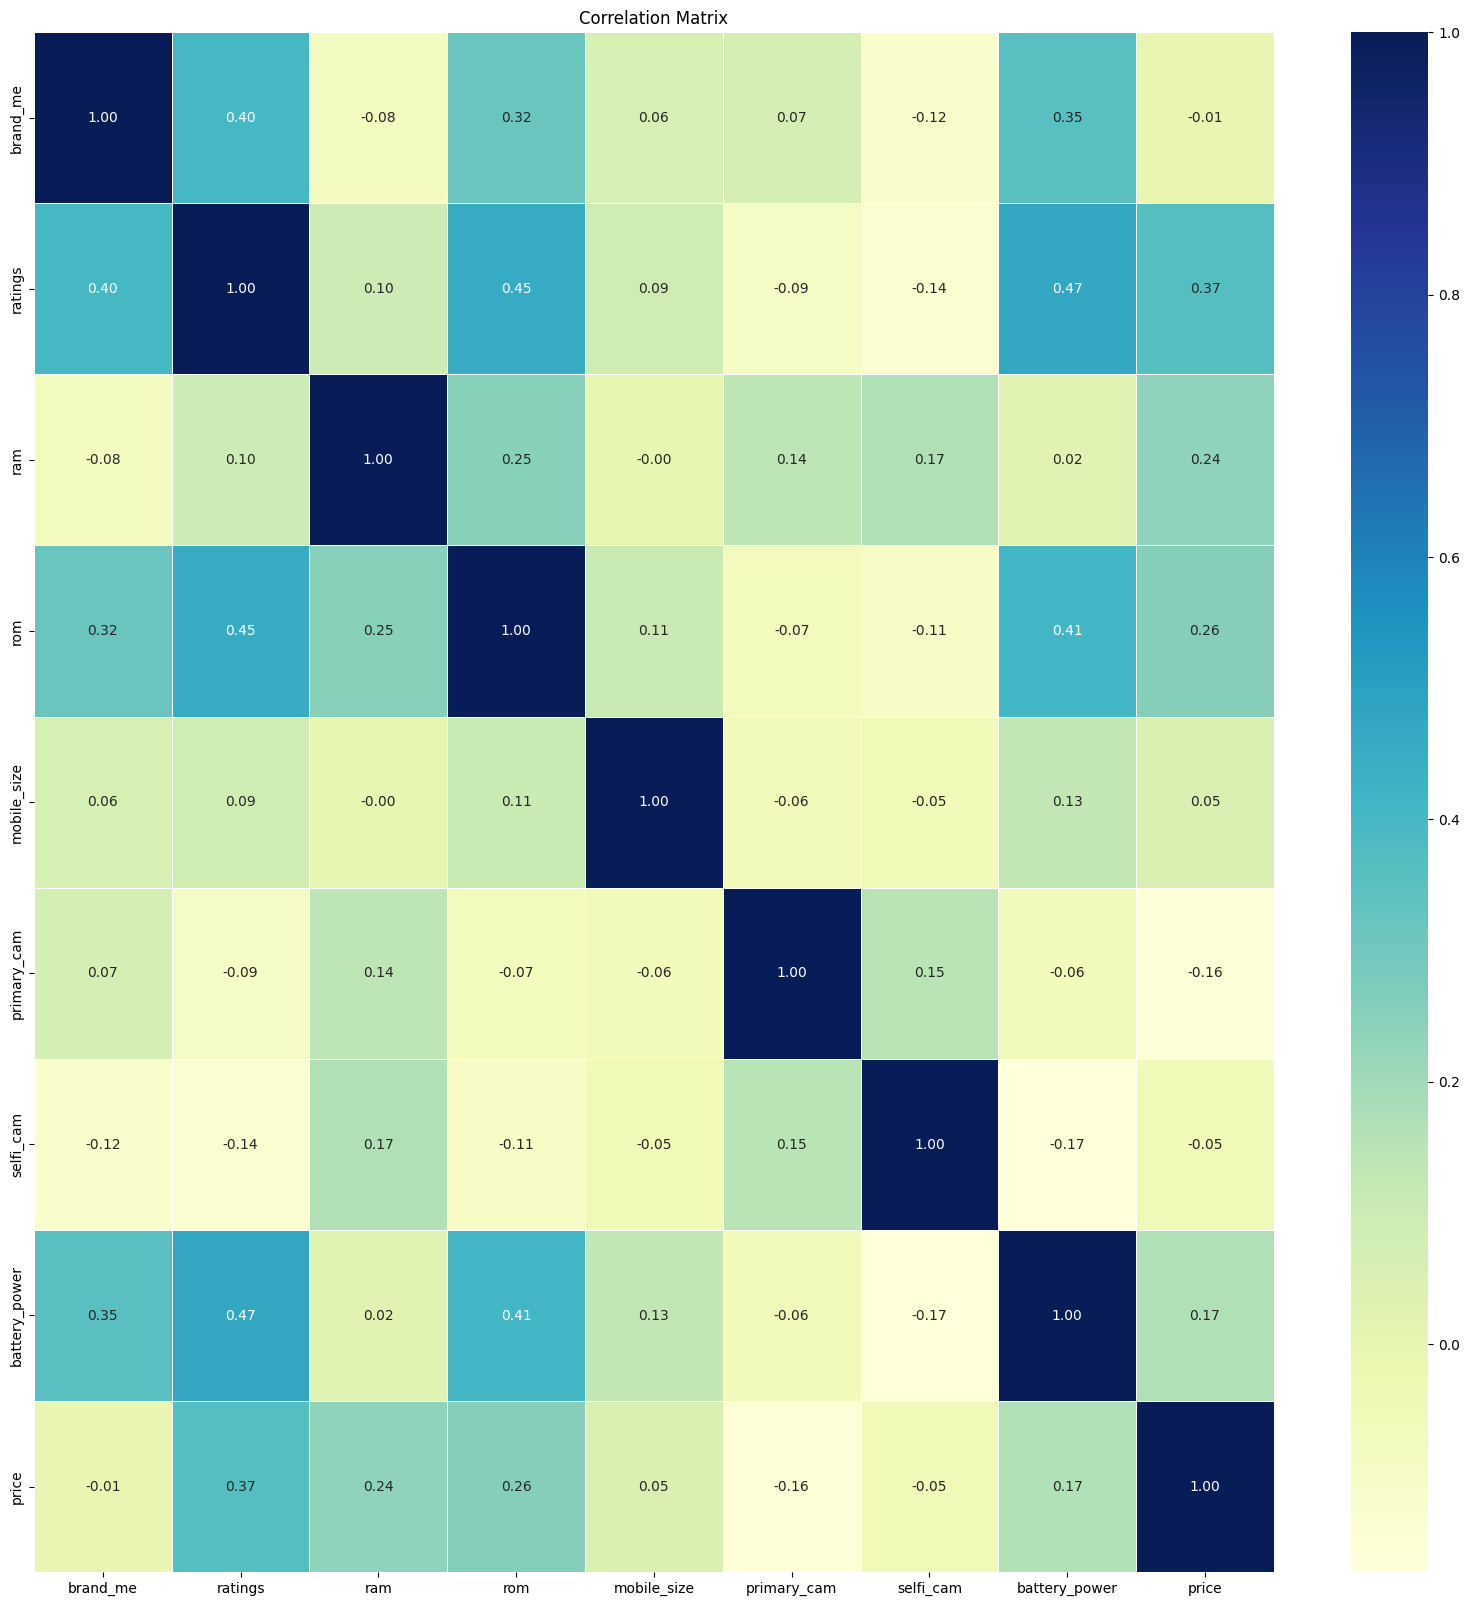

In [288]:
for column in data.columns:
    data[column] = pd.to_numeric(data[column], errors='coerce')  # Convert to numeric, setting errors='coerce' will convert invalid parsing to NaN

numeric_data = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_data.corr()

# Display the correlation matrix
print(correlation_matrix)

correlation_matrix_filled = correlation_matrix.fillna(0)

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [289]:
data.isnull().sum()

,0
brand_me,0
ratings,0
ram,0
rom,0
mobile_size,0
primary_cam,0
selfi_cam,0
battery_power,0
price,0


In [290]:
data.columns

Index(['brand_me', 'ratings', 'ram', 'rom', 'mobile_size', 'primary_cam',
       'selfi_cam', 'battery_power', 'price'],
      dtype='object')

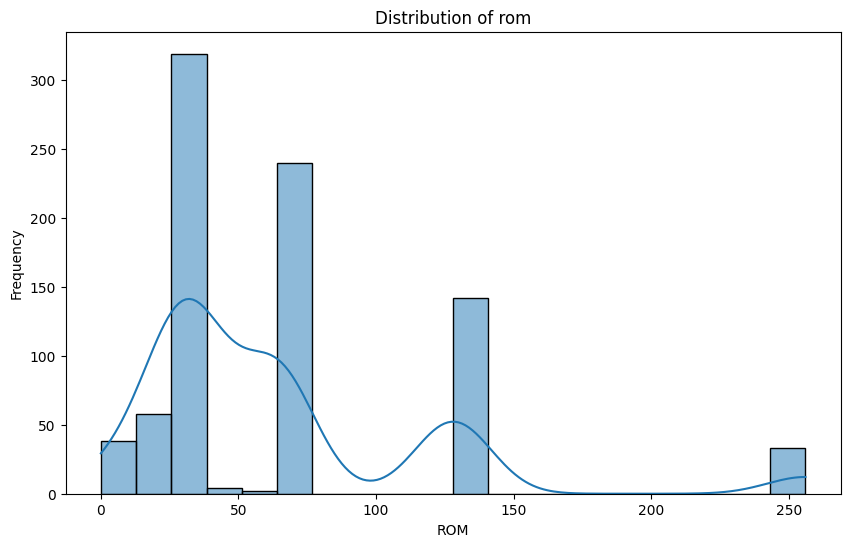

In [291]:
#Visualizing the distribution of numerical features
plt.figure(figsize=(10, 6))
sns.histplot(data['rom'], kde=True, bins=20)
plt.title('Distribution of rom')
plt.xlabel('ROM')
plt.ylabel('Frequency')
plt.show()

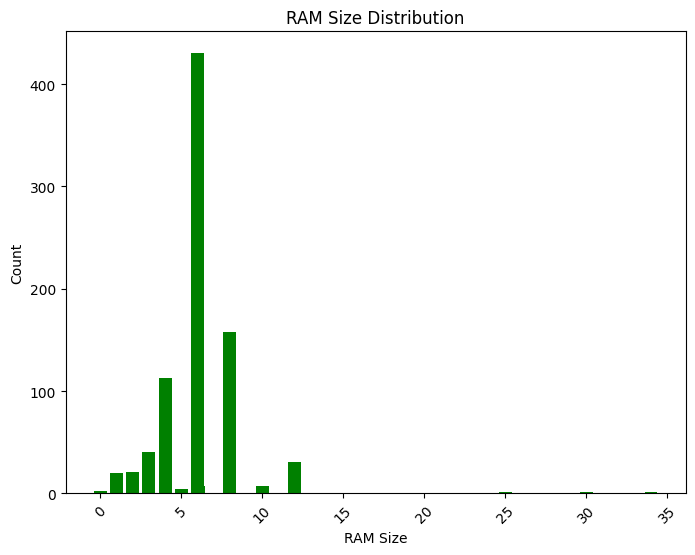

In [292]:
# Count occurrences of each RAM size
ram_counts = data['ram'].value_counts()

# Create the bar chart
plt.figure(figsize=(8, 6))
plt.bar(ram_counts.index, ram_counts.values, color='green')

# Add titles and labels
plt.title('RAM Size Distribution')
plt.xlabel('RAM Size')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

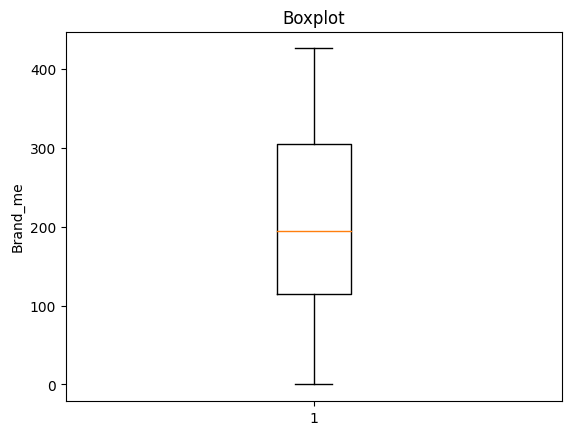

In [293]:
plt.boxplot(data['brand_me'])
plt.title('Boxplot')
plt.ylabel('Brand_me')
plt.show()

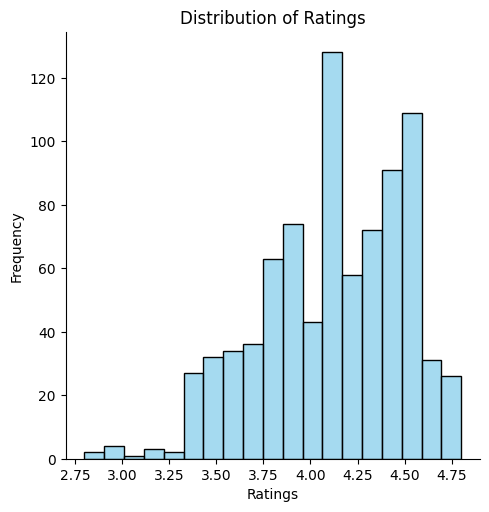

In [294]:
sns.displot(data["ratings"], color='skyblue')
plt.title("Distribution of Ratings")
plt.xlabel("Ratings")
plt.ylabel("Frequency")
plt.show()

In [295]:
# Feature and target selection
X = data[['brand_me', 'ratings', 'ram', 'rom', 'mobile_size', 'primary_cam', 'selfi_cam', 'battery_power']]
y = data['price']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Apply RFE to select top features
rfe = RFE(estimator=rf_regressor, n_features_to_select=3)
rfe.fit(X_train, y_train)

# Get the ranking of features
feature_ranking = pd.DataFrame({'Feature': X.columns, 'Ranking': rfe.ranking_})
print("Features ranked by RFE:")
print(feature_ranking.sort_values('Ranking'))

# Transform the dataset to keep only selected features
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

Features ranked by RFE:
         Feature  Ranking
0       brand_me        1
1        ratings        1
4    mobile_size        1
6      selfi_cam        2
2            ram        3
3            rom        4
5    primary_cam        5
7  battery_power        6


# Model Selection and Building

##  Random Forest Regressor Model

In [296]:
# Train the Random Forest Regressor with selected features
rf_regressor.fit(X_train_rfe, y_train)

# Make predictions
rf_predictions = rf_regressor.predict(X_test_rfe)

# Evaluate the model with regression metrics
print("Random Forest Regressor Evaluation with Selected Features:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, rf_predictions))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, rf_predictions))
print("Root Mean Squared Error (RMSE):", math.sqrt(mean_squared_error(y_test, rf_predictions)))
print("R² Score:", r2_score(y_test, rf_predictions))

Random Forest Regressor Evaluation with Selected Features:
Mean Absolute Error (MAE): 3609.4703378555964
Mean Squared Error (MSE): 299956664.83019185
Root Mean Squared Error (RMSE): 17319.257051911663
R² Score: 0.8709848771818367


In [297]:
# Save the Random Forest Regressor model to a file
joblib.dump(rf_regressor, 'random_forest_regressor_model_rfe.pkl')

# To load the model later
loaded_rf_regressor = joblib.load('random_forest_regressor_model_rfe.pkl')
